# Regressão Linear para Previsão de Preços de Imóveis

## 1. Objetivo do Estudo

Construir um modelo de regressão linear para prever o valor mediano das casas no dataset California Housing, avaliando a qualidade do modelo e a importância das variáveis.

## 2. Fonte & Licença

Dataset *California Housing* (scikit-learn). Licença: BSD-3 Clause.

## 3. Dicionário de Dados

- `MedInc`: Renda mediana.
- `HouseAge`: Idade mediana da casa.
- `AveRooms`: Média de quartos.
- `MedHouseVal`: Valor mediano da casa (alvo).

## 4. Metodologia

Carregamento do dataset California Housing. Análise de correlação. Ajuste do modelo de Regressão Linear Múltipla (OLS) usando `statsmodels`. Verificação dos pressupostos (linearidade, normalidade dos resíduos, homocedasticidade). Análise de multicolinearidade (VIF). Interpretação dos coeficientes e métricas do modelo.

## 5. Análise e Resultados

Carregando dados do arquivo local: ..\..\data\raw\california_housing.csv
Primeiras 5 linhas das variáveis independentes (X):
   const  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0    1.0  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1    1.0  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2    1.0  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3    1.0  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4    1.0  3.8462      52.0  6.281853   1.081081       565.0  2.181467   

   Latitude  Longitude  
0     37.88    -122.23  
1     37.86    -122.22  
2     37.85    -122.24  
3     37.85    -122.25  
4     37.85    -122.25  

Primeiras 5 linhas da variável dependente (y):
0    1.509839
1    1.276758
2    1.258745
3    1.227592
4    1.230225
Name: MedHouseVal, dtype: float64


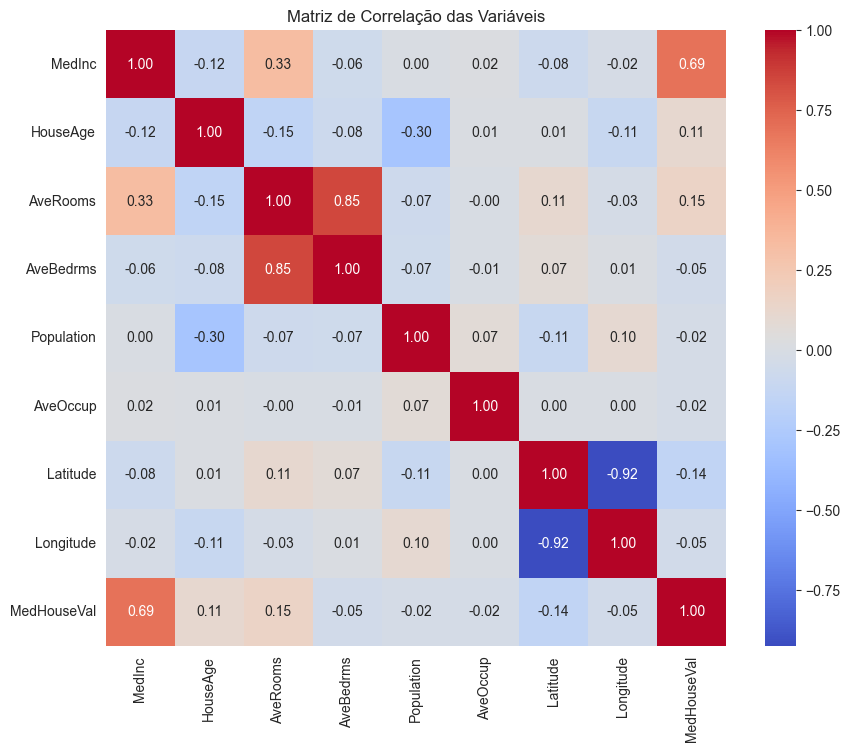


Resumo do Modelo de Regressão Linear:
                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     4109.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:42:19   Log-Likelihood:                -7819.3
No. Observations:               20640   AIC:                         1.566e+04
Df Residuals:                   20631   BIC:                         1.573e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

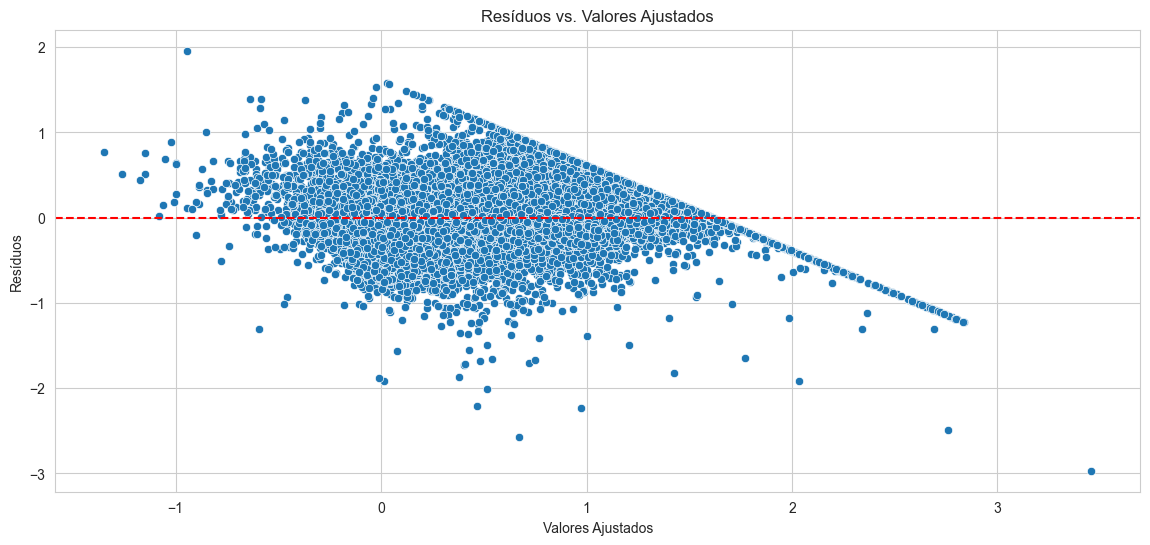

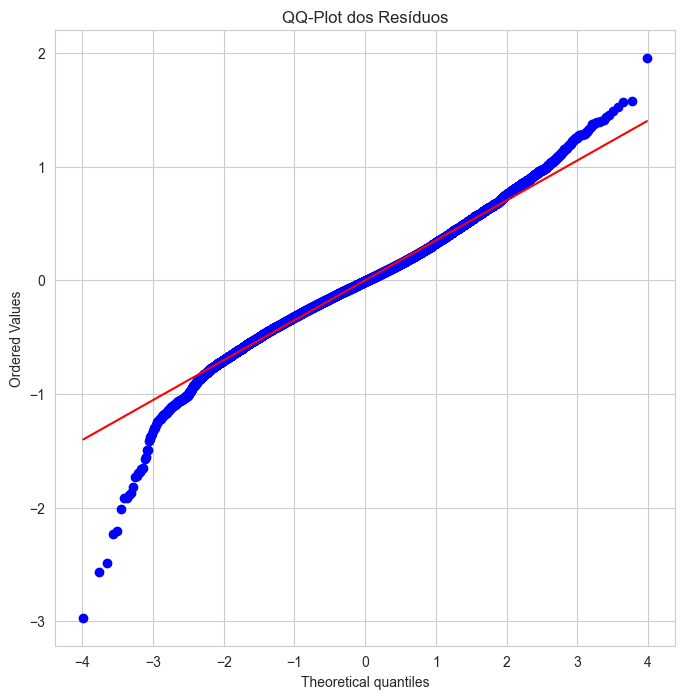


Teste de Shapiro-Wilk para Resíduos: W=0.988, p=0.000
  Há evidências para rejeitar a hipótese nula de normalidade dos resíduos.

Fatores de Inflação da Variância (VIF):
      feature           VIF
0       const  17082.623698
7    Latitude      9.297624
8   Longitude      8.962263
3    AveRooms      8.342786
4   AveBedrms      6.994995
1      MedInc      2.501295
2    HouseAge      1.241254
5  Population      1.138125
6    AveOccup      1.008324


c:\portfolio\statistics-for-data\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20640.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
# Imports iniciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import fetch_california_housing
import os
from pathlib import Path

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
np.random.seed(42) # Para reprodutibilidade

# 5.1. Carregar e Preparar os Dados
# Tentar carregar do arquivo CSV local primeiro
data_path = Path('../../data/raw/california_housing.csv')
if data_path.exists():
    print(f"Carregando dados do arquivo local: {data_path}")
    df = pd.read_csv(data_path)
else:
    # Se o arquivo local não existir, usar scikit-learn
    print("Carregando dados diretamente do scikit-learn")
    housing = fetch_california_housing()
    df = pd.DataFrame(housing.data, columns=housing.feature_names)
    df['MedHouseVal'] = housing.target

# Variável dependente (y) e independentes (X)
y = np.log(df['MedHouseVal']) # Usando log-transformação para normalizar a distribuição
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]

# Adicionar uma constante ao modelo (necessário para statsmodels)
X = sm.add_constant(X)

print("Primeiras 5 linhas das variáveis independentes (X):")
print(X.head())
print("\nPrimeiras 5 linhas da variável dependente (y):")
print(y.head())

# 5.2. Análise de Correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.show()

# 5.3. Ajuste do Modelo de Regressão Linear (OLS)
model = sm.OLS(y, X).fit()
print("\nResumo do Modelo de Regressão Linear:")
print(model.summary())

# 5.4. Verificação dos Pressupostos
# Resíduos
residuals = model.resid
fitted_values = model.fittedvalues

# Linearidade e Homocedasticidade (Resíduos vs. Valores Ajustados)
plt.figure(figsize=(14, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

# Normalidade dos Resíduos (QQ-Plot)
plt.figure(figsize=(8, 8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot dos Resíduos')
plt.show()

# Teste de Normalidade dos Resíduos (Shapiro-Wilk)
shapiro_res = stats.shapiro(residuals)
print(f"\nTeste de Shapiro-Wilk para Resíduos: W={shapiro_res.statistic:.3f}, p={shapiro_res.pvalue:.3f}")
if shapiro_res.pvalue > 0.05:
    print("  Não há evidências para rejeitar a hipótese nula de normalidade dos resíduos.")
else:
    print("  Há evidências para rejeitar a hipótese nula de normalidade dos resíduos.")

# 5.5. Análise de Multicolinearidade (VIF)
# Remover a constante antes de calcular o VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Corrigindo a duplicata na impressão
print("\nFatores de Inflação da Variância (VIF):")
print(vif_data.sort_values(by='VIF', ascending=False))

## 6. Interpretação

- **Resumo do Modelo**: A tabela de resumo do `statsmodels` fornece uma riqueza de informações, incluindo os coeficientes de regressão, seus p-valores, R-quadrado, R-quadrado ajustado e estatísticas de teste F.
- **Coeficientes**: Cada coeficiente indica a mudança esperada na variável dependente (log do valor da casa) para cada unidade de aumento na variável independente correspondente, mantendo as outras variáveis constantes. Coeficientes com p-valores baixos (tipicamente < 0.05) são considerados estatisticamente significativos.
- **R-quadrado e R-quadrado Ajustado**: O R-quadrado indica a proporção da variância na variável dependente que é explicada pelo modelo. O R-quadrado ajustado é uma versão modificada que penaliza a inclusão de preditores desnecessários, sendo mais útil para comparar modelos com diferentes números de preditores.
- **Pressupostos**: A verificação dos pressupostos é crucial para a validade do modelo:
  - **Linearidade e Homocedasticidade**: O gráfico de resíduos versus valores ajustados deve mostrar uma dispersão aleatória dos pontos em torno de zero, sem padrões visíveis (linearidade) e com uma variância constante (homocedasticidade). Padrões como funil ou curvas indicam violação.
  - **Normalidade dos Resíduos**: O QQ-Plot e o teste de Shapiro-Wilk ajudam a verificar se os resíduos seguem uma distribuição normal. Resíduos normais são um pressuposto para a inferência estatística (p-valores, intervalos de confiança).
- **Multicolinearidade (VIF)**: Valores de VIF acima de 5 ou 10 indicam multicolinearidade significativa, o que pode tornar os coeficientes de regressão instáveis e difíceis de interpretar. Nesses casos, pode ser necessário remover variáveis ou combiná-las.

## 7. Limitações

- A regressão linear assume uma relação linear entre as variáveis. Se a relação for não linear, o modelo pode não ser adequado.
- A qualidade do modelo depende da satisfação dos pressupostos. Violações severas podem levar a conclusões inválidas.
- A transformação logarítmica da variável dependente facilita a modelagem, mas a interpretação dos coeficientes na escala original requer exponenciação.
- O modelo não considera fatores externos não incluídos nas variáveis, que podem influenciar o preço das casas.

## 8. Reprodutibilidade

- **Semente Aleatória**: `np.random.seed(42)` foi utilizada para garantir a reprodutibilidade de quaisquer processos aleatórios.
- **Versões das Bibliotecas**: As versões das bibliotecas utilizadas podem ser verificadas executando `pip freeze` no ambiente do projeto.